100.0%┣██████████████████████████████████████████┫ 1/1 [00:00<Inf:Inf, 0.0 it/s]


┌ Warning: `DataFrame(columns::AbstractMatrix)` is deprecated, use `DataFrame(columns, :auto)` instead.
│   caller = #generate#1(::Int64, ::Function, ::Main.Ntl.Models.Changepoint{Main.Ntl.Models.NtlParameters{Main.Ntl.Models.GeometricArrivals},Main.Ntl.Models.GaussianParameters}) at synthetic.jl:185
└ @ Main.Ntl.Generate /Users/seanla/Projects/ntl-stick-breaking-julia/src/synthetic.jl:185
┌ Warning: `DataFrame(columns::AbstractMatrix)` is deprecated, use `DataFrame(columns, :auto)` instead.
│   caller = #generate#1(::Int64, ::Function, ::Main.Ntl.Models.Changepoint{Main.Ntl.Models.NtlParameters{Main.Ntl.Models.GeometricArrivals},Main.Ntl.Models.GaussianParameters}) at synthetic.jl:187
└ @ Main.Ntl.Generate /Users/seanla/Projects/ntl-stick-breaking-julia/src/synthetic.jl:187


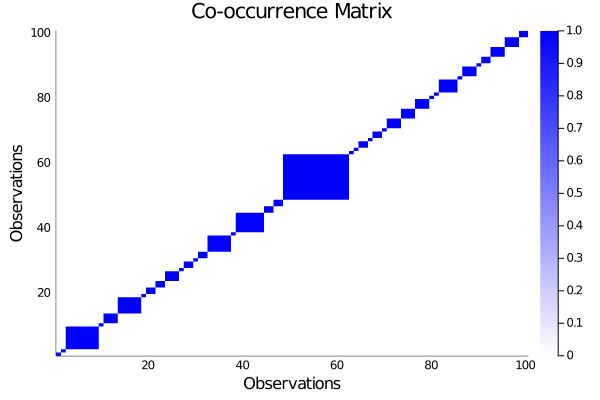

In [13]:
include("../ntl.jl")
import Random

using LinearAlgebra
Random.seed!(1)
data_covariance = Matrix{Float64}(0.1I, 2, 2)
prior_covariance = Matrix{Float64}(I, 2, 2)
prior_mean = Vector{Float64}(zeros(2))
data_parameters = Ntl.Models.GaussianParameters(data_covariance, prior_mean, prior_covariance)

psi_prior = Vector{Float64}([1, 1])
phi_prior = Vector{Float64}([1, 1])
geometric_arrival = Ntl.Models.GeometricArrivals(phi_prior)
ntl_cluster_parameters = Ntl.Models.NtlParameters(psi_prior, geometric_arrival)

changepoint_model = Ntl.Models.Changepoint(ntl_cluster_parameters, data_parameters)

changepoint = Ntl.Generate.generate(changepoint_model, n=100)
data = Matrix(transpose(changepoint[:, 2:end]))
true_changepoints = changepoint[:, 1]
Ntl.Plot.plot_assignments(true_changepoints)
Ntl.Plot.plot_co_occurrence_matrix(true_changepoints)

100.0%┣██████████████████████████████████████┫ 999/999 [00:02<00:00, 563.1 it/s]
100.0%┣███████████████████████████████████┫ 1000/1000 [00:01<00:00, 1865.9 it/s]


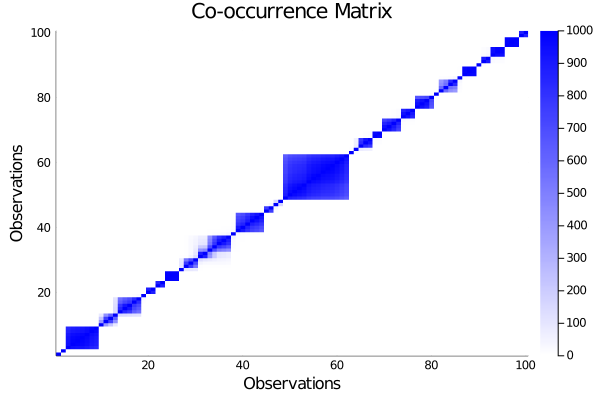

In [14]:
gibbs_sampler = Ntl.Samplers.GibbsSampler(num_iterations=1000)
results = Ntl.Fitter.fit(data, changepoint_model, gibbs_sampler)
Ntl.Plot.plot_co_occurrence_matrix(results)

100.0%┣██████████████████████████████████████┫ 999/999 [00:01<00:00, 735.2 it/s]
100.0%┣███████████████████████████████████┫ 1000/1000 [00:01<00:00, 1870.9 it/s]


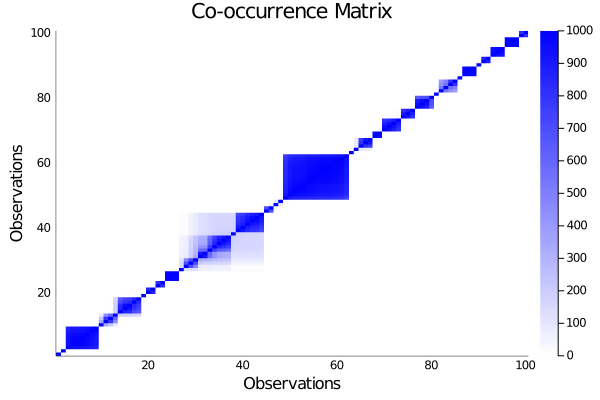

In [16]:
gibbs_sampler = Ntl.Samplers.GibbsSampler(num_iterations=1000)
dp_parameters = Ntl.Models.DpParameters(1, 1)
dp_changepoint_model = Ntl.Models.Changepoint(dp_parameters, data_parameters)
dp_results = Ntl.Fitter.fit(data, dp_changepoint_model, gibbs_sampler)
Ntl.Plot.plot_co_occurrence_matrix(dp_results)

100.0%┣█████████████████████████████████████████┫ 99/99 [00:04<00:00, 26.5 it/s]
100.0%┣███████████████████████████████████┫ 1000/1000 [00:01<00:00, 1843.2 it/s]


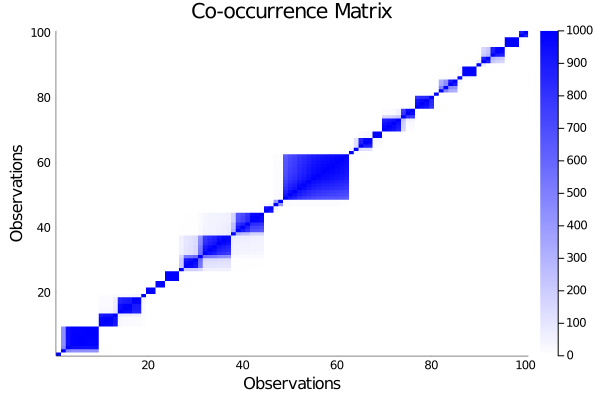

In [17]:
smc = Ntl.Samplers.SequentialMonteCarlo(num_particles=1000, ess_threshold=0., resample_at_end=false)
(particles, weights) = Ntl.Fitter.fit(data, changepoint_model, smc)
Ntl.Plot.plot_co_occurrence_matrix(particles)

100.0%┣███████████████████████████████████┫ 1000/1000 [00:01<00:00, 1747.8 it/s]


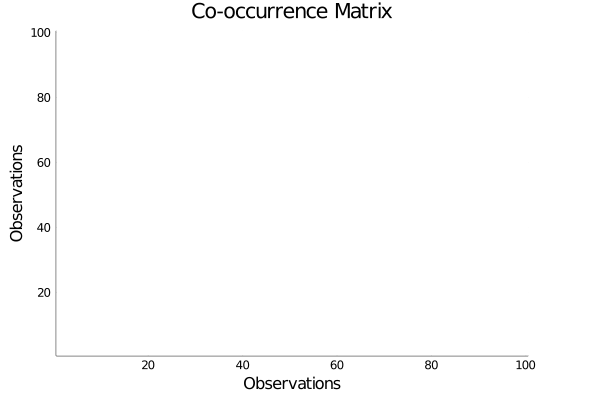

GKS: Rectangle definition is invalid in routine SET_WINDOW
GKS: Rectangle definition is invalid in routine CELLARRAY
invalid range
origin outside current window


In [18]:
Ntl.Plot.plot_co_occurrence_matrix(particles, weights)

In [19]:
weights

1000-element Array{Float64,1}:
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 ⋮  
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0